In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

plt.ion()
%matplotlib widget

import matplotlib as ml


In [36]:
amp_list = [10, 8, 6, 4, 2] # [1/np.sqrt(10), 1/np.sqrt(8), 1/np.sqrt(6), 1/np.sqrt(4), 1/np.sqrt(2), 1/np.sqrt(1)] 
# power_list = [17.9, 18.3, 19.1, 20.5, 23.2, 25.4] # mW
power_list = [17.65, 18, 18.5, 19.5, 21.6] # mW

time_sep = 100 # ns


mmt = 0


amp = amp_list[mmt]
power = power_list[mmt]*1e-3 # W

# sequence = np.loadtxt(f'Data/Amplitude sweep/{amp}_100ns_02082024.csv', delimiter=',', skiprows=2)
# no_light = np.loadtxt(f'Data/Scope data/N_100ns_01082024.csv', delimiter=',', skiprows=2)

sequence = np.loadtxt(f'Data/Amplitude sweep/{amp}_2_100ns_02082024.csv', delimiter=',', skiprows=2)
no_light = np.loadtxt(f'Data/Scope data/N_100ns_01082024.csv', delimiter=',', skiprows=2)

time = sequence[:, 0]*1e9 # ns
total_time_window = time[-1] - time[0]
print(f'Total time: {total_time_window} ns')



Total time: 4.992187999999999 ns


Background: -0.0001353752154628672
Pulse integrated: 4.747312243830058e-11
CW integrated: 1.5683279231890424e-11
CW integrated over 100 ns: 7.746176177142445e-10
Total: 8.22090740152545e-10


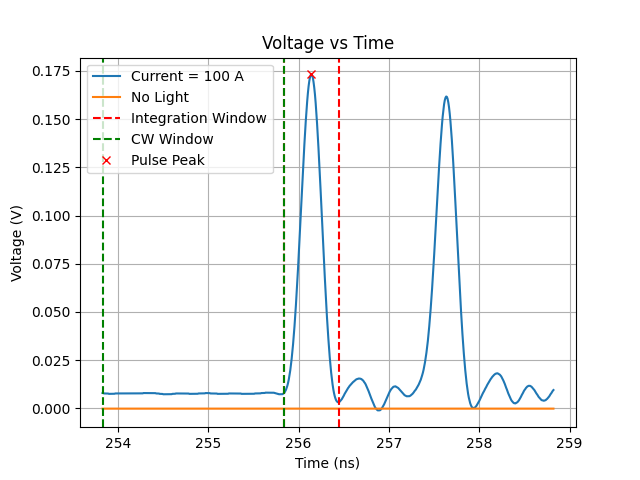

In [38]:
peaks_single, _ = find_peaks(sequence[:, 1], height=0.07)
peaks_double, _ = find_peaks(sequence[:, 1], prominence, distance=100)

peaks = peaks_double

time_peak = time[peaks[0]]

integration_window_pulse = 0.3
window_pulse_right = time_peak + integration_window_pulse
window_pulse_left = time_peak - integration_window_pulse

window_CW_right = window_pulse_left
window_CW_left = time[0]
time_CW_window = window_CW_right - window_CW_left
time_CW_total = (time_sep-2*integration_window_pulse)

# Integrate no light
no_light_integrated = np.trapz(no_light[:, 1], no_light[:, 0])
voltage_no_light = np.mean(no_light[:, 1])
print(f'Background: {voltage_no_light}')

# Integrate the pulse
pulse = sequence[(time > window_pulse_left) & (time < window_pulse_right)] - voltage_no_light
pulse_integrated = np.trapz(pulse[:, 1], pulse[:, 0])

# Integrate the CW
CW = sequence[(time > window_CW_left) & (time < window_CW_right)] - voltage_no_light # times 2 because we consider CW on both sides of pulse, but right side has oscillations
CW_integrated = np.trapz(CW[:, 1], CW[:, 0])
CW_integrated_total = (time_CW_total/time_CW_window) * CW_integrated

total = pulse_integrated + CW_integrated_total  # this is the integration of a 100ns window with one pulse and rest CW

print(f'Pulse integrated: {pulse_integrated}')
print(f'CW integrated: {CW_integrated}')
print(f'CW integrated over 100 ns: {CW_integrated_total}')
print(f'Total: {total}')

# Plot data
plt.figure()
plt.plot(time, sequence[:, 1], label='Current = 100 A')
plt.plot(time, no_light[:, 1], label='No Light')
plt.axvline(x=window_pulse_right, color='r', linestyle='--', label='Integration Window')
plt.axvline(x=window_pulse_left, color='r', linestyle='--')
plt.axvline(x=window_CW_right, color='g', linestyle='--', label='CW Window')
plt.axvline(x=window_CW_left, color='g', linestyle='--')
plt.plot(time[peaks[0]], sequence[peaks[0], 1], 'x', color='r', label='Pulse Peak')
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.title('Voltage vs Time')
plt.grid()
plt.show()

In [34]:
# Power estimation

energy_per_ns = power * 1e-9 # mW
energy_in_total_window = time_sep * energy_per_ns 
print(f'Energy in total window: {energy_in_total_window} J')

energy_pulse = (pulse_integrated / total) * energy_in_total_window
energy_CW = (CW_integrated_total / total) * energy_in_total_window 

print(f'Energy in pulse: {energy_pulse*1e12} pJ')
print(f'Energy in CW: {energy_CW*1e12} pJ')

power_CW = energy_CW / time_sep # J/ns
print(f'Power in CW: {1e3*power_CW*1e9} mJ/s (= mW)')

Energy in total window: 2.3200000000000003e-09 J
Energy in pulse: 498.05400554414774 pJ
Energy in CW: 1821.9459944558525 pJ
Power in CW: 18.219459944558526 mJ/s (= mW)


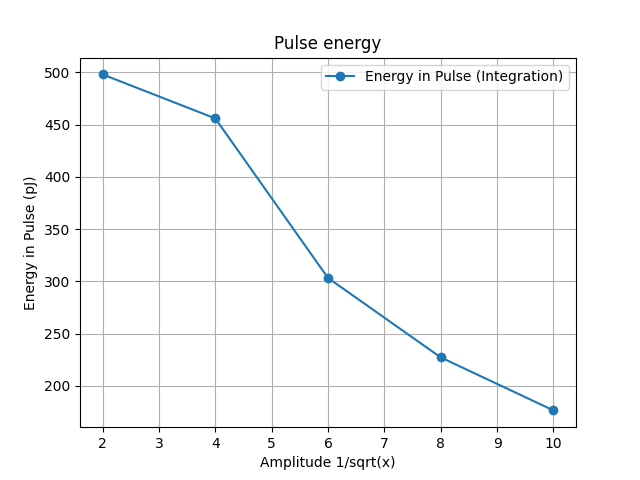

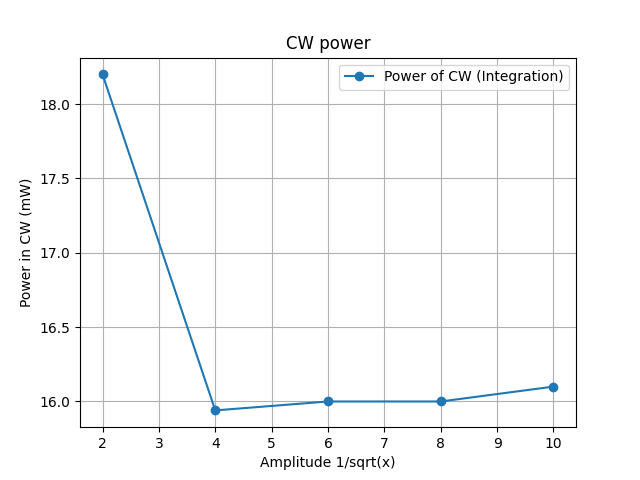

In [35]:

energy_pulse_list_single = [176.6, 227.3, 303.3, 455.9, 498]
power_CW_list_single = [16.1, 16, 16, 15.94, 18.2]

energy_pulse_list_double = [176.6, 227.3, 303.3, 455.9, 498]
power_CW_list_double = [16.1, 16, 16, 15.94, 18.2]

# energy_pulse_list_ = [176.6, 227.3, 303.3, 455.9, 498]
# power_CW_list_single = [16.1, 16, 16, 15.94, 18.2]

# energy_pulse_list_powermeter = [82, 263, 443, 609, 783]
# power_CW_list_powermeter = [1.25, 4.37, 7.77, 11.01, 13.97]


plt.figure()
plt.plot(amp_list, energy_pulse_list_single, 'o-', label='Energy in Pulse (Integration)')
# plt.plot(amp_list, energy_pulse_list_powermeter, 'o-', label='Energy in Pulse (Powermeter, no seq.)')
plt.xlabel('Amplitude 1/sqrt(x)')
plt.ylabel('Energy in Pulse (pJ)')
plt.title('Pulse energy')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(amp_list, power_CW_list_single, 'o-', label='Power of CW (Integration)')
# plt.plot(amp_list, power_CW_list_powermeter, 'o-', label='Power of CW (Powermeter, no seq.)')
plt.xlabel('Amplitude 1/sqrt(x)')
plt.ylabel('Power in CW (mW)')
plt.title('CW power')
plt.legend()
plt.grid()
plt.show()